In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, RocCurveDisplay
from sklearn.model_selection import KFold

In [21]:
# df = pd.read_csv(r"C:\MasterThesis\v1.0\sEEG_dataset.csv")
df = pd.read_csv(r"C:\MasterThesis\v1.0\multi_dataset.csv")
print(df.head())
print(df.shape)
df = df.dropna()
print(df.shape)

labels = df['labels']
df = df.drop(df.columns[-1], axis=1)
X = df
y = labels

          0         1         2         3         4         5         6  \
0  3.130274  3.145135  3.159808  3.174293  3.188590  3.202701  3.216624   
1  1.185297  1.189124  1.192699  1.196024  1.199098  1.201922  1.204497   
2  0.952164  0.970118  0.987834  1.005314  1.022555  1.039560  1.056327   
3 -2.565043 -2.521034 -2.477274 -2.433764 -2.390504 -2.347495 -2.304738   
4  8.859166  8.877924  8.896420  8.914654  8.932627  8.950338  8.967787   

          7         8         9  ...      666.1      667.1      668.1  \
0  3.230361  3.243912  3.257277  ... -14.313534 -12.249162 -10.452110   
1  1.206821  1.208897  1.210723  ... -16.595458 -14.598791 -12.820661   
2  1.072857  1.089149  1.105203  ... -15.839713 -13.825235 -12.051191   
3 -2.262233 -2.219981 -2.177982  ... -14.830472 -12.793262 -11.008756   
4  8.984975  9.001902  9.018568  ... -15.285183 -13.249338 -11.466423   

       669.1     670.1     671.1     672.1     673.1     674.1  labels  
0  -8.916367 -7.638558 -6.616892 -5.8

In [22]:
sm = SMOTE(random_state=0)
X, y = sm.fit_resample(X, y)

In [23]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

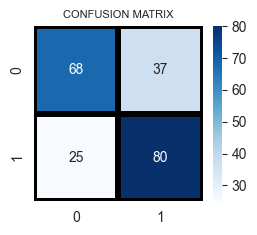

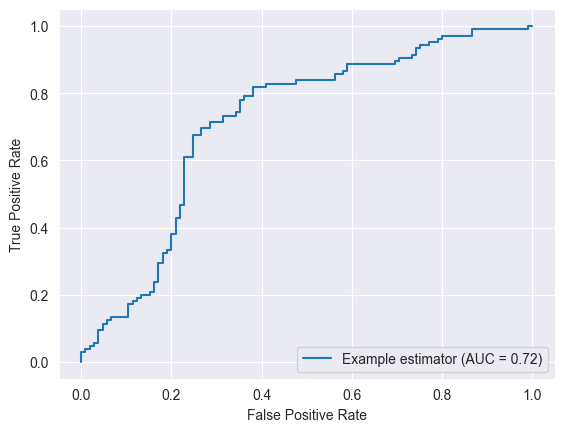

Average Accuracy: 70.47619047619048%
Average AUC: 0.7291245791245791


In [24]:
# Setting up the KFold parameters
n_splits = 10
kf = KFold(n_splits=n_splits, random_state=42, shuffle=True)

accuracy_list = []
roc_auc_list = []
# Lists to store predictions and true labels
y_true_global = []
y_pred_global = []
y_pred_prob_global = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    accuracy_list.append(accuracy)

    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    roc_auc_list.append(roc_auc)

    y_true_global.extend(y_test)
    y_pred_global.extend(predictions)
    y_pred_prob_global.extend(y_pred_prob)

avg_accuracy = sum(accuracy_list) / n_splits
avg_roc_auc = sum(roc_auc_list) / n_splits
#Confusion matrix
plt.figure(figsize=(6, 5))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_true_global, y_pred_global), annot=True, cmap="Blues", fmt="d", linecolor="k",
            linewidths=3)
plt.title("CONFUSION MATRIX", fontsize=8)
# ROC curve
fpr, tpr, _ = roc_curve(y_true_global, y_pred_prob_global)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Example estimator')
display.plot()
plt.show()
print(f"Average Accuracy: {avg_accuracy*100}%")
print(f"Average AUC: {avg_roc_auc}")

In [25]:
CROSS_VALIDATION = True

if not CROSS_VALIDATION:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # tworzenie modelu
    model = LogisticRegression(max_iter=1000)
    # trenowanie modelu
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    # sprawdzanie dokładności modelu
    accuracy = accuracy_score(y_test, predictions)

    print(f"Accuracy: {accuracy*100}%")
    #Confusion matrix
    plt.figure(figsize=(6,5))
    plt.subplot(221)
    sns.heatmap(confusion_matrix(y_test,predictions),annot=True,cmap="Blues",fmt = "d",linecolor="k",linewidths=3)
    plt.title("CONFUSION MATRIX",fontsize=8)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Example estimator')
    display.plot()
    plt.show()